In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

/Users/priyanshunayan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/priyanshunayan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/priyanshunayan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/priyanshunayan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
tf.__version__

'2.2.0'

In [3]:
hotel_review = pd.read_csv('Hotel_Reviews.csv')

In [4]:
hotel_review.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
hotel_review.shape

(515738, 17)

In [84]:
positive_review = hotel_review.loc[:,['Positive_Review']]
negative_review = hotel_review.loc[:,['Negative_Review']]

In [46]:
# Remove No Positive rows from Positve Reviews

In [240]:
options = ['No Positive', 'No Negative']
selected_positive_review = positive_review.loc[~(positive_review['Positive_Review'] == "No Positive"), :]
selected_negative_review = negative_review.loc[~(negative_review['Negative_Review'] == "No Negative"), :]
selected_positive_review['is_positive'] = 1
selected_positive_review.columns = ['review', 'is_positive']
selected_positive_review.head()

/Users/priyanshunayan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1


In [241]:
selected_negative_review['is_postive'] = 0
selected_negative_review.columns = ['review', 'is_positive']

/Users/priyanshunayan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [242]:
selected_positive_review = selected_positive_review[:387848]

In [243]:
selected_negative_review.head()

,review,is_positive
0,I am so angry that i made this post available...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,0
4,You When I booked with your company on line y...,0
5,Backyard of the hotel is total mess shouldn t...,0


In [133]:
selected_positive_review.head()

,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1


In [244]:
reviews = selected_positive_review.append(selected_negative_review)

In [245]:
reviews.head(n=10)

,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1
5,Good restaurant with modern design great chil...,1
6,The room is spacious and bright The hotel is ...,1
7,Good location Set in a lovely park friendly s...,1
9,The room was big enough and the bed is good T...,1
10,Rooms were stunningly decorated and really sp...,1


In [153]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyanshunayan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyanshunayan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [155]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [156]:
# clean text data
reviews["review"] = reviews["review"].apply(lambda x: clean_text(x))

In [164]:
reviews = reviews.iloc[91000:]

In [201]:
reviews_text = reviews['review'].tolist()
labels = reviews['is_positive'].tolist()

enc = LabelEncoder()
encoded_labels = enc.fit_transform(labels)


#TOKENIZE
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
import nltk
nltk.download('punkt')
complete_reviews=[] 
for review in reviews['review']:
  for sent in sent_tokenize(review):
    complete_reviews.append(sent)
print('complete_reviews done') 
final_corpus = [sentence for sentence in complete_reviews if sentence.strip() !='']
print('final corpus done')
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyanshunayan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


complete_reviews done
final corpus done


In [204]:
#import fasttext
!pip install gensim
from gensim.models.fasttext import FastText
model_ted = FastText(word_tokenized_corpus, size=100, window=5, min_count=5, workers=4,sg=1)

In [205]:
# model parameters
vocab_size = 1000
embedding_dim = 16
max_length = 200
truc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

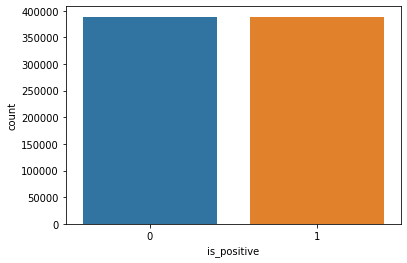

In [185]:
import seaborn as sns
sns.countplot(x="is_positive",data=reviews)

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
# splitting dataset using stratified sampling
x_train, x_val, y_train, y_val = train_test_split(reviews.review, 
                                                  reviews.is_positive, 
                                                  test_size=0.30, 
                                                  random_state=17,
                                                  stratify=reviews.is_positive.values
                                               )

In [188]:
import pandas as pd
data_train = pd.DataFrame()
data_test  = pd.DataFrame()
data_train['label'] = y_train
data_train['text'] = x_train
data_test['label'] = y_val
data_test['text'] = x_val

In [206]:
train_sentences = data_train['text'].tolist()
train_labels = data_train['label'].tolist()
test_sentences = data_test['text'].tolist()
test_labels = data_test['label'].tolist()
data_train.groupby(['label']).count()

,text
label,
0,271494
1,272154


In [190]:
#Ratio of +ve and -ve reviews in training dataset
ratio = str(data_train['label'].value_counts()[0]/data_train['label'].value_counts()[1])
print("ratio of +ve to -ve dataEntry- "+ratio+":1")

ratio of +ve to -ve dataEntry- 0.9975749024449393:1


In [192]:
y_train.head(n=10)

473420    1
255299    1
476781    1
245395    1
296282    0
338300    0
392761    0
464075    0
374267    0
337212    0
Name: is_positive, dtype: int64

In [216]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
y_test = test_labels
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [194]:
# WITH WORD EMBEDDING

In [211]:
#init model

In [217]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#compile model
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [218]:
num_epoch = 10
history = model.fit(train_padded, train_labels, verbose=1, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
16989/16989 [==============================] - 25s 1ms/step - loss: 0.2435 - accuracy: 0.9052 - val_loss: 0.2273 - val_accuracy: 0.9106
Epoch 2/10
16989/16989 [==============================] - 32s 2ms/step - loss: 0.2158 - accuracy: 0.9172 - val_loss: 0.2101 - val_accuracy: 0.9198
Epoch 3/10
16989/16989 [==============================] - 35s 2ms/step - loss: 0.2123 - accuracy: 0.9181 - val_loss: 0.2077 - val_accuracy: 0.9204
Epoch 4/10
16989/16989 [==============================] - 52s 3ms/step - loss: 0.2102 - accuracy: 0.9189 - val_loss: 0.2079 - val_accuracy: 0.9203
Epoch 5/10
16989/16989 [==============================] - 44s 3ms/step - loss: 0.2081 - accuracy: 0.9196 - val_loss: 0.2059 - val_accuracy: 0.9206
Epoch 6/10
16989/16989 [==============================] - 38s 2ms/step - loss: 0.2060 - accuracy: 0.9206 - val_loss: 0.2054 - val_accuracy: 0.9212
Epoch 7/10
16989/16989 [==============================] - 37s 2ms/step - loss: 0.2044 - accuracy: 0.9214 - val_loss: 0

In [232]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
x_pred = model.predict(test_padded)
x_pred = x_pred > 0.5

In [235]:
x_pred = x_pred.astype(int)

In [236]:
y_pred = test_labels

In [237]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [238]:
confusion_matrix(x_pred, y_pred)

array([[107962,   9730],
       [  8392, 106908]])

In [239]:
# loss and Accuracy

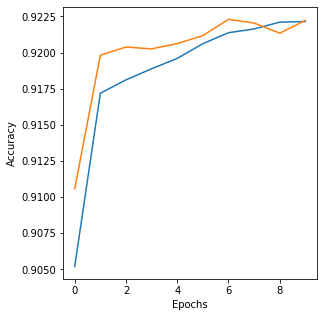

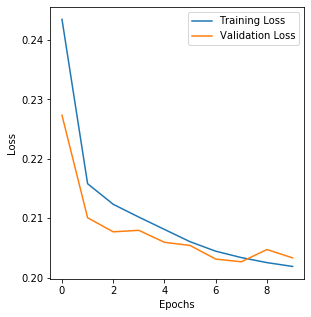

In [250]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

In [252]:
# WITH CNN

In [253]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#compile model
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          10368     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [254]:
history = model.fit(train_padded, train_labels, verbose=1, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
16989/16989 [==============================] - 267s 16ms/step - loss: 0.2149 - accuracy: 0.9164 - val_loss: 0.1967 - val_accuracy: 0.9257
Epoch 2/10
16989/16989 [==============================] - 295s 17ms/step - loss: 0.1937 - accuracy: 0.9266 - val_loss: 0.1906 - val_accuracy: 0.9275
Epoch 3/10
16989/16989 [==============================] - 338s 20ms/step - loss: 0.1882 - accuracy: 0.9286 - val_loss: 0.1873 - val_accuracy: 0.9283
Epoch 4/10
16989/16989 [==============================] - 323s 19ms/step - loss: 0.1841 - accuracy: 0.9300 - val_loss: 0.1878 - val_accuracy: 0.9279
Epoch 5/10
16989/16989 [==============================] - 326s 19ms/step - loss: 0.1805 - accuracy: 0.9312 - val_loss: 0.1827 - val_accuracy: 0.9300
Epoch 6/10
16989/16989 [==============================] - 328s 19ms/step - loss: 0.1776 - accuracy: 0.9325 - val_loss: 0.1819 - val_accuracy: 0.9310
Epoch 7/10
16989/16989 [==============================] - 323s 19ms/step - loss: 0.1751 - accuracy: 0.9338

In [255]:
x_pred = model.predict(test_padded)
x_pred = x_pred > 0.5
x_pred = x_pred.astype(int)
y_pred = test_labels
confusion_matrix(x_pred, y_pred)

array([[110646,  10315],
       [  5708, 106323]])

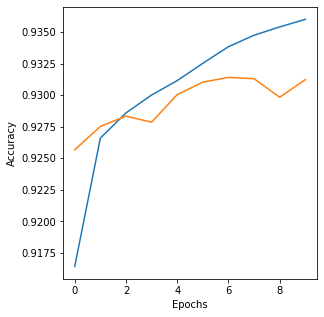

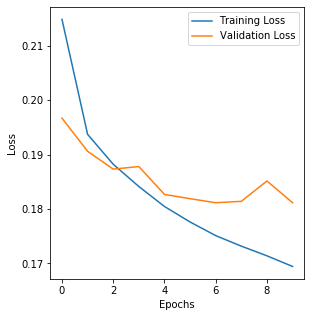

In [256]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

In [257]:
#With RNN

In [260]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#compile model
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 16)           16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 80)                18240     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1944      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 36,209
Trainable params: 36,209
Non-trainable params: 0
_________________________________________________________________


In [262]:
history = model.fit(train_padded, train_labels, verbose=1, epochs=5, validation_data=(test_padded, test_labels))

Epoch 1/5
16989/16989 [==============================] - 2410s 142ms/step - loss: 0.2012 - accuracy: 0.9231 - val_loss: 0.1939 - val_accuracy: 0.9271
Epoch 2/5
16989/16989 [==============================] - 4422s 260ms/step - loss: 0.1828 - accuracy: 0.9306 - val_loss: 0.1788 - val_accuracy: 0.9320
Epoch 3/5
16989/16989 [==============================] - 3704s 218ms/step - loss: 0.1763 - accuracy: 0.9331 - val_loss: 0.1783 - val_accuracy: 0.9325
Epoch 4/5
16989/16989 [==============================] - 2968s 175ms/step - loss: 0.1724 - accuracy: 0.9348 - val_loss: 0.1772 - val_accuracy: 0.9333
Epoch 5/5
16989/16989 [==============================] - 1818s 107ms/step - loss: 0.1695 - accuracy: 0.9362 - val_loss: 0.1743 - val_accuracy: 0.9342


In [264]:
x_pred = model.predict(test_padded)
x_pred = x_pred > 0.5
x_pred = x_pred.astype(int)
y_pred = test_labels
confusion_matrix(x_pred, y_pred)

array([[110075,   9053],
       [  6279, 107585]])

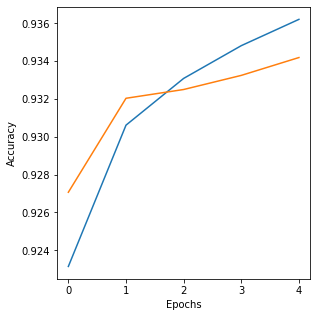

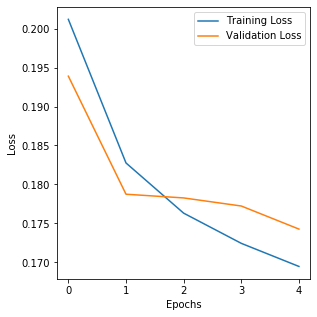

In [265]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()